<a href="https://colab.research.google.com/github/WaithiraHawi/LuxProject/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
#Loading dataset
weather_file1= 'Weather_dataset.csv'
Weathrdt = pd.read_csv(weather_file1)

In [ ]:
The project covers:
Exploratory Data Analysis (EDA) for patterns, insights, and potential anomalies within the Weather dataset.
The project covers:
Data Overview and Cleaning
Statistical Summary
Data Visualization
Weather Patterns and Trends
Insights and Conclusions
Recommendations for Further Analysis

In [ ]:
#Data Overview and Data Cleaning

In [ ]:
#Data Overview
print("Dataset Info:")
print(Weathrdt.info())
print("\nFirst 5 rows of the dataset:")
print(Weathrdt.head())

#Data Cleaning

#Checking Missing or Null Values
missing_values = Weathrdt.isnull().sum()
print("\nMissing or Null Values in Each Column:")
print(missing_values)

# Checking Duplicated Records
duplicate_records = Weathrdt.duplicated().sum()
print("\nNumber of Duplicate Records:", duplicate_records)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB
None

First 5 rows of the dataset:
       Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0  1/1/2012 0:00    -1.8              -3.9         86                4   
1  1/1/2012 1:00    -1.8              -3.7         87                4   
2  1/1/2012 2:00    -1.8              -3.4         89                7   
3  1/1/2012 3:0

In [ ]:
Data Overview and Cleaning


Key Characteristics of the Dataset

Number of Records: 8,784
Number of Features: 8
Data Types
4 features are of type float64 such as Temp_C, Dew Point Temp_C.
2 features are of type int64 such as Rel Hum_%, Wind Speed_km/h.
2 features are of type object such as Date/Time, and weather

Handling Missing or Null Values
The dataset doesn't contain null values.
This is indicated by the non-null count for every column being equal to the total number of entries (8,784).

Duplicate Records

There are no duplicate records in the dataset.

In [ ]:
# Check data types
print(Weathrdt.dtypes)

Date/Time           datetime64[ns]
Temp_C                     float64
Dew Point Temp_C           float64
Rel Hum_%                    int64
Wind Speed_km/h              int64
Visibility_km              float64
Press_kPa                  float64
Weather                     object
dtype: object


In [ ]:
import pandas as pd

# Check data types
print(Weathrdt.dtypes)

# Convert relevant columns to numeric (if needed)
# You can specify a subset of columns if you know which ones need conversion
Weathrdt['Temp_C'] = pd.to_numeric(Weathrdt['Temp_C'], errors='coerce')
Weathrdt['Rel Hum_%'] = pd.to_numeric(Weathrdt['Rel Hum_%'], errors='coerce')
Weathrdt['Wind Speed_km/h'] = pd.to_numeric(Weathrdt['Wind Speed_km/h'], errors='coerce')
Weathrdt['Visibility_km'] = pd.to_numeric(Weathrdt['Visibility_km'], errors='coerce')

# After ensuring columns are numeric, you can proceed with the statistical summary
summary = Weathrdt.describe()
print("Statistical Summary of Numerical Features:")
print(summary)

# Select only numeric columns
numeric_Weathrdt = Weathrdt.select_dtypes(include=['float64', 'int64'])

# Identifying Outliers using the IQR method
Q1 = numeric_Weathrdt.quantile(0.25)
Q3 = numeric_Weathrdt.quantile(0.75)
IQR = Q3 - Q1

# The Outliers are values below (Q1 - 1.5 * IQR) or above (Q3 + 1.5 * IQR)
outliers_Weathrdt = ((numeric_Weathrdt < (Q1 - 1.5 * IQR)) | (numeric_Weathrdt > (Q3 + 1.5 * IQR))).sum()
print("\nNumber of Outliers in Each Numerical Column:")
print(outliers_Weathrdt)

# Filtering out the outliers for each column
for column in numeric_Weathrdt.columns:
    outlier_Weathrdt_values = numeric_Weathrdt[(numeric_Weathrdt[column] < (Q1[column] - 1.5 * IQR[column])) |
                        (numeric_Weathrdt[column] > (Q3[column] + 1.5 * IQR[column]))]
    print(f"\nOutliers in '{column}' column:")
    print(outlier_Weathrdt_values[column])

Date/Time           datetime64[ns]
Temp_C                     float64
Dew Point Temp_C           float64
Rel Hum_%                    int64
Wind Speed_km/h              int64
Visibility_km              float64
Press_kPa                  float64
Weather                     object
dtype: object
Statistical Summary of Numerical Features:
                 Date/Time       Temp_C  Dew Point Temp_C    Rel Hum_%  \
count                 8784  8784.000000       8784.000000  8784.000000   
mean   2012-07-01 23:30:00     8.798144          2.555294    67.431694   
min    2012-01-01 00:00:00   -23.300000        -28.500000    18.000000   
25%    2012-04-01 11:45:00     0.100000         -5.900000    56.000000   
50%    2012-07-01 23:30:00     9.300000          3.300000    68.000000   
75%    2012-10-01 11:15:00    18.800000         11.800000    81.000000   
max    2012-12-31 23:00:00    33.000000         24.400000   100.000000   
std                    NaN    11.687883         10.883072    16.918881 

In [ ]:
Notes:
The describe() function gives a summary of the mean, median (50% quantile), standard deviation, minimum, maximum, and quartiles (25% and 75%).

Outliers:
They are the data points significantly differing from other major observations in a dataset.
This can occur due to variability in factors such as experimental errors or the data, thereby influencing results in statistical analyses.
Features
Extreme Values lie far away from the main cluster of data.
Influence on Statistics includes a skewed mean, variance, and other statistical metrics, often leading to misleading conclusions.

Interquartile Range (IQR) Method
Calculate the first quartile (Q1) and the third quartile (Q3).
Compute the IQR:
IQR = 𝑄3−𝑄1
IQR=Q3−Q1.
Outliers are typically defined as points outside the range
[Q1−1.5×IQR,Q3+1.5×IQR].
Also, the z score can be used.

SyntaxError: invalid character '−' (U+2212) (1399660804.py, line 13)

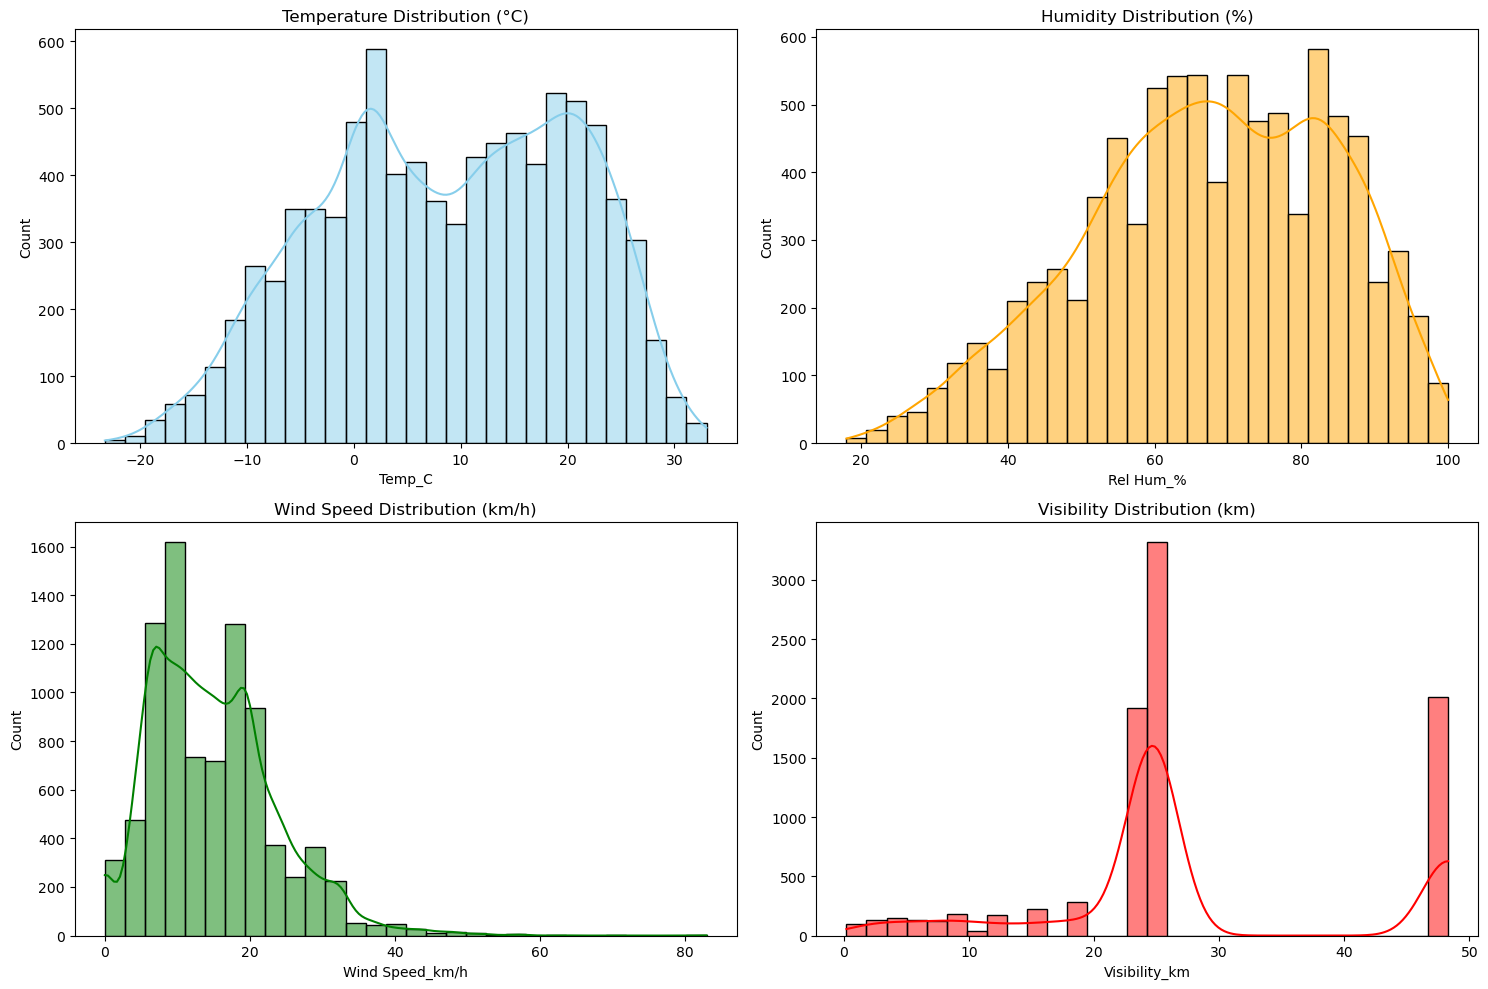

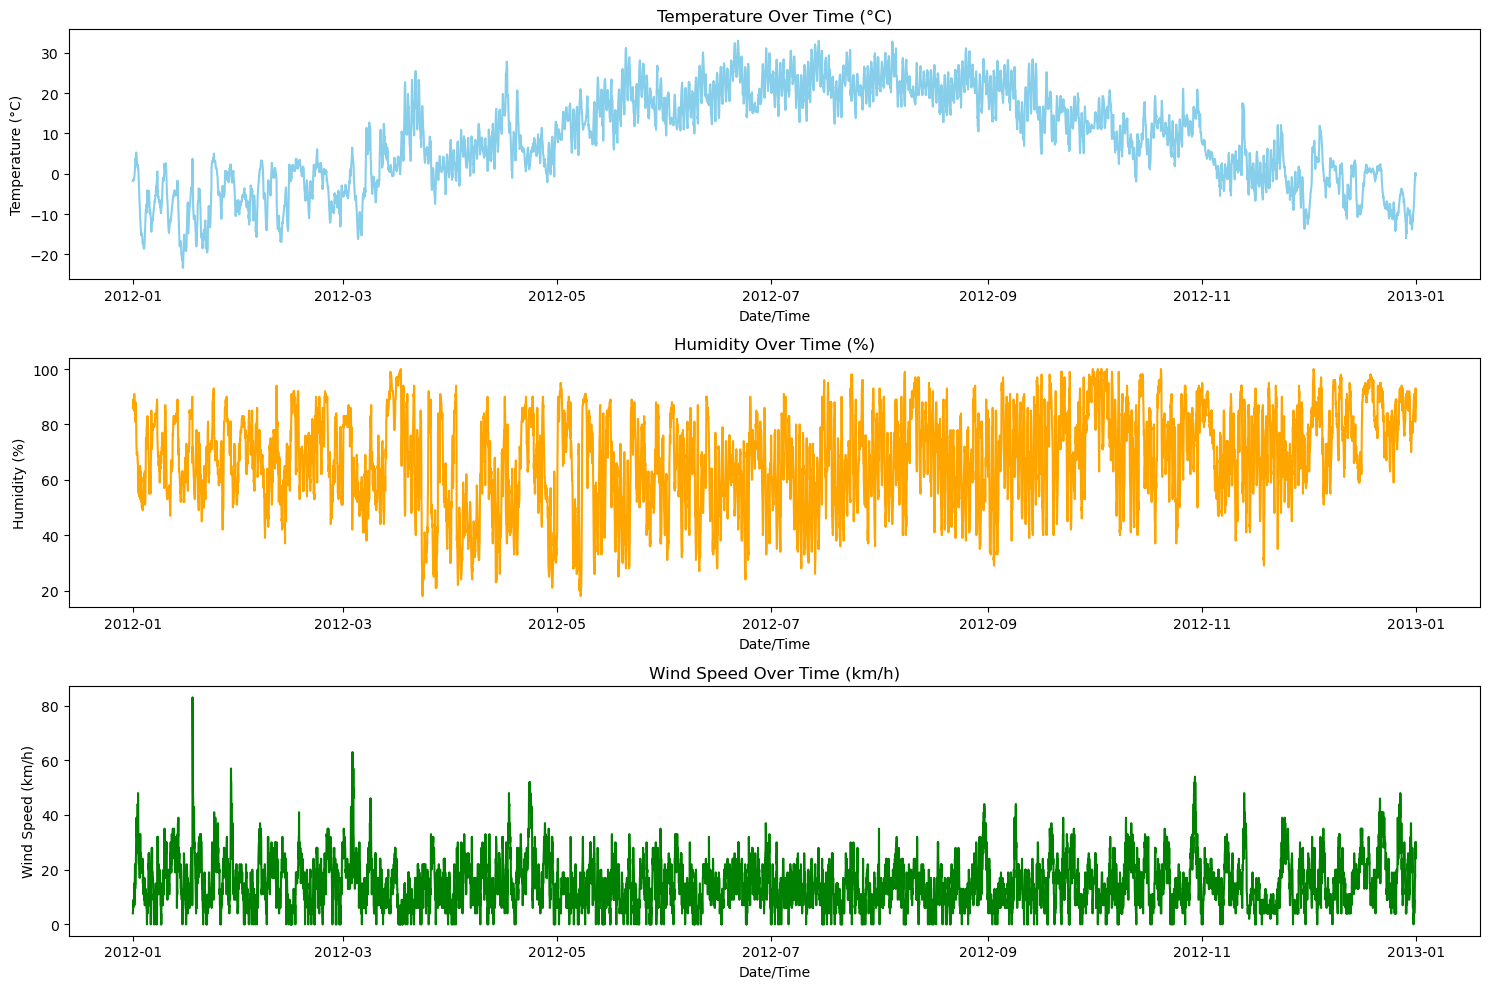

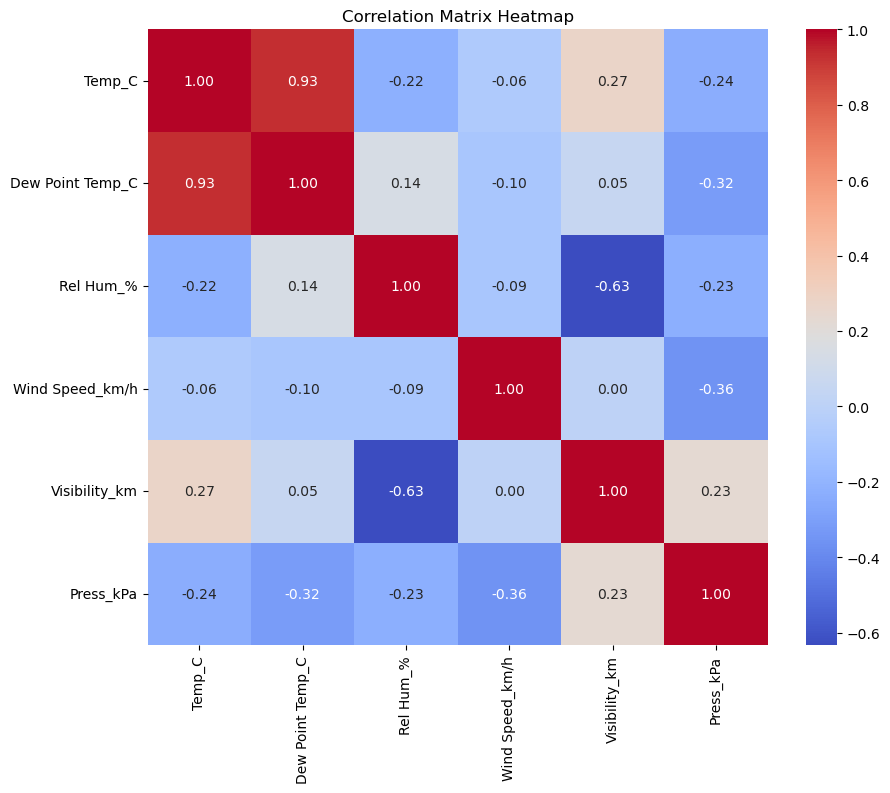

In [ ]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Loading weather dataset
weather_file1 = 'Weather_dataset.csv'
Weathrdt = pd.read_csv(weather_file1)

# Converting 'Date/Time' to datetime format
Weathrdt['Date/Time'] = pd.to_datetime(Weathrdt['Date/Time'])

# Converting the relevant columns to numeric (if needed)
Weathrdt['Temp_C'] = pd.to_numeric(Weathrdt['Temp_C'], errors='coerce')
Weathrdt['Rel Hum_%'] = pd.to_numeric(Weathrdt['Rel Hum_%'], errors='coerce')
Weathrdt['Wind Speed_km/h'] = pd.to_numeric(Weathrdt['Wind Speed_km/h'], errors='coerce')
Weathrdt['Visibility_km'] = pd.to_numeric(Weathrdt['Visibility_km'], errors='coerce')

# Data Visualization
# Distribution of Key Weather Parameters
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(Weathrdt['Temp_C'], kde=True, bins=30, color='skyblue')
plt.title('Temperature Distribution (°C)')

plt.subplot(2, 2, 2)
sns.histplot(Weathrdt['Rel Hum_%'], kde=True, bins=30, color='orange')
plt.title('Humidity Distribution (%)')

plt.subplot(2, 2, 3)
sns.histplot(Weathrdt['Wind Speed_km/h'], kde=True, bins=30, color='green')
plt.title('Wind Speed Distribution (km/h)')

plt.subplot(2, 2, 4)
sns.histplot(Weathrdt['Visibility_km'], kde=True, bins=30, color='red')
plt.title('Visibility Distribution (km)')

plt.tight_layout()
plt.show()

# Time Series Graphs for the Observed Trends
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.plot(Weathrdt['Date/Time'], Weathrdt['Temp_C'], color='skyblue')
plt.title('Temperature Over Time (°C)')
plt.xlabel('Date/Time')
plt.ylabel('Temperature (°C)')

plt.subplot(3, 1, 2)
plt.plot(Weathrdt['Date/Time'], Weathrdt['Rel Hum_%'], color='orange')
plt.title('Humidity Over Time (%)')
plt.xlabel('Date/Time')
plt.ylabel('Humidity (%)')

plt.subplot(3, 1, 3)
plt.plot(Weathrdt['Date/Time'], Weathrdt['Wind Speed_km/h'], color='green')
plt.title('Wind Speed Over Time (km/h)')
plt.xlabel('Date/Time')
plt.ylabel('Wind Speed (km/h)')

plt.tight_layout()
plt.show()

# Correlation Matrix and the Heatmap
numeric_Weathrdt = Weathrdt.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_Weathrdt.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

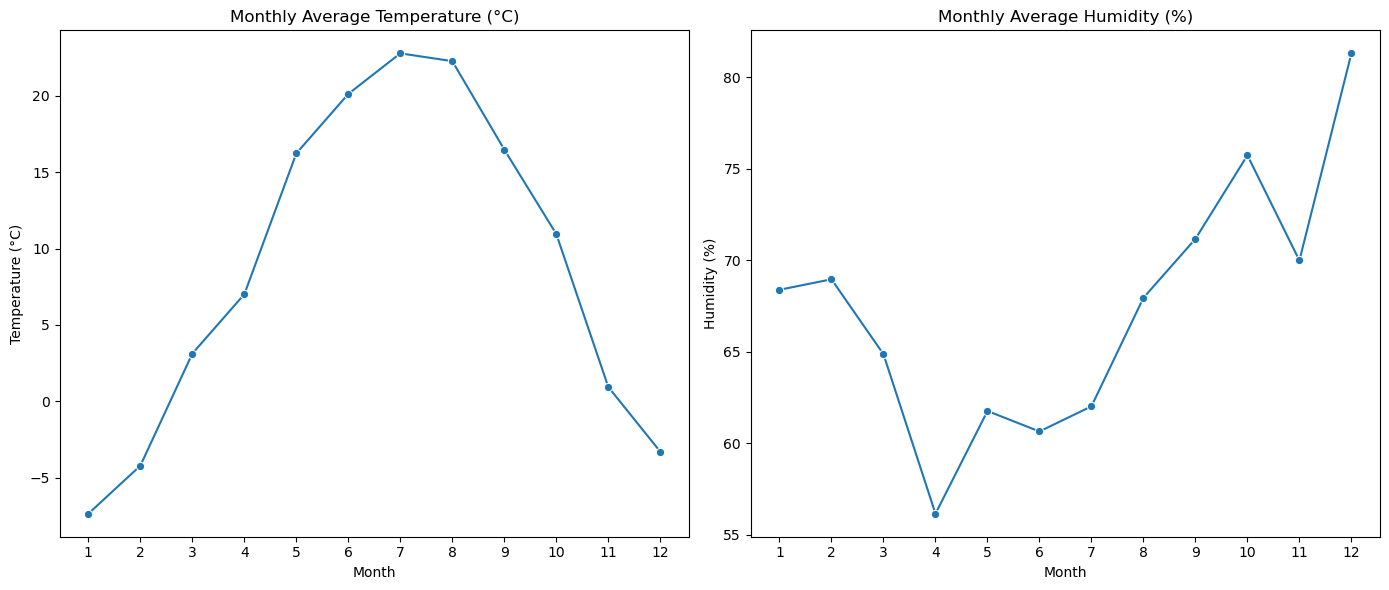

C:\Users\PROBOOK 430\AppData\Local\Temp\ipykernel_13432\2367437053.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Season', y='Temp_C', data=seasonal_avg, palette='coolwarm')
C:\Users\PROBOOK 430\AppData\Local\Temp\ipykernel_13432\2367437053.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Season', y='Rel Hum_%', data=seasonal_avg, palette='coolwarm')


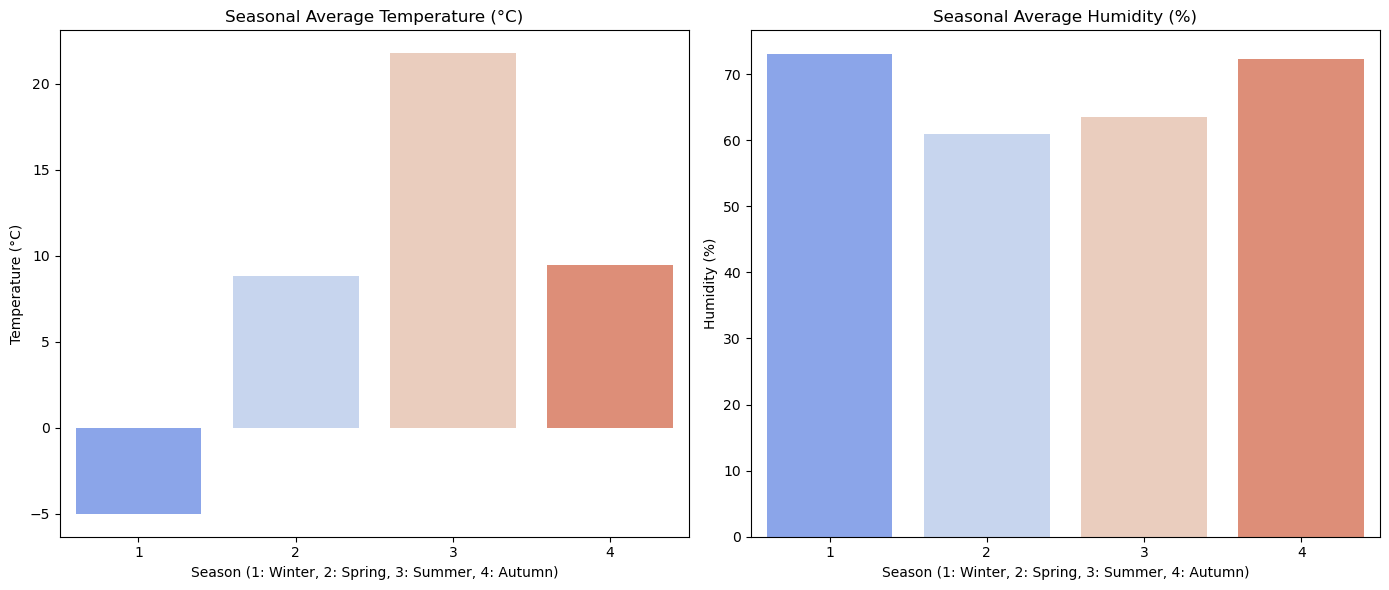

In [ ]:
#Seasonal and monthly trends
# Converting 'Date/Time' to datetime format and extract month and season
Weathrdt['Date/Time'] = pd.to_datetime(Weathrdt['Date/Time'])
Weathrdt['Month'] = Weathrdt['Date/Time'].dt.month
Weathrdt['Season'] = Weathrdt['Date/Time'].dt.month % 12 // 3 + 1  # Dec-Feb: Winter, Mar-May: Spring, Jun-Aug: Summer, Sep-Nov: Autumn

#Monthly Average Temperature and Humidity
monthly_avg = Weathrdt.groupby('Month').agg({'Temp_C': 'mean', 'Rel Hum_%': 'mean'}).reset_index()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.lineplot(x='Month', y='Temp_C', data=monthly_avg, marker='o')
plt.title('Monthly Average Temperature (°C)')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.xticks(range(1, 13))

plt.subplot(1, 2, 2)
sns.lineplot(x='Month', y='Rel Hum_%', data=monthly_avg, marker='o')
plt.title('Monthly Average Humidity (%)')
plt.xlabel('Month')
plt.ylabel('Humidity (%)')
plt.xticks(range(1, 13))

plt.tight_layout()
plt.show()

#Seasonal Average Temperature and Humidity
seasonal_avg = Weathrdt.groupby('Season').agg({'Temp_C': 'mean', 'Rel Hum_%': 'mean'}).reset_index()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Season', y='Temp_C', data=seasonal_avg, palette='coolwarm')
plt.title('Seasonal Average Temperature (°C)')
plt.xlabel('Season (1: Winter, 2: Spring, 3: Summer, 4: Autumn)')
plt.ylabel('Temperature (°C)')

plt.subplot(1, 2, 2)
sns.barplot(x='Season', y='Rel Hum_%', data=seasonal_avg, palette='coolwarm')
plt.title('Seasonal Average Humidity (%)')
plt.xlabel('Season (1: Winter, 2: Spring, 3: Summer, 4: Autumn)')
plt.ylabel('Humidity (%)')

plt.tight_layout()
plt.show()

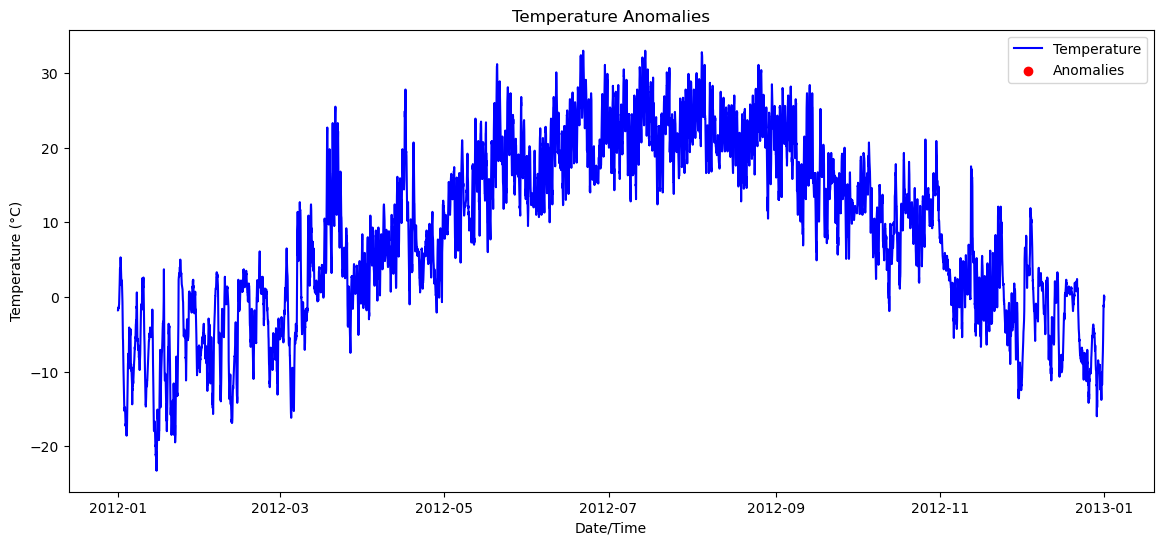

Anomalies in Temperature Data:
Empty DataFrame
Columns: [Date/Time, Temp_C, Weather]
Index: []


In [ ]:
# Detecting Anomalies

# Calculating Z-scores
Weathrdt['Temp_zscore'] = stats.zscore(Weathrdt['Temp_C'])

# Identifying anomalies with z score
anomalies = Weathrdt[(Weathrdt['Temp_zscore'] > 3) | (Weathrdt['Temp_zscore'] < -3)]

# Plotting anomalies
plt.figure(figsize=(14, 6))
plt.plot(Weathrdt['Date/Time'], Weathrdt['Temp_C'], label='Temperature', color='blue')
plt.scatter(anomalies['Date/Time'], anomalies['Temp_C'], color='red', label='Anomalies', marker='o')
plt.title('Temperature Anomalies')
plt.xlabel('Date/Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

# Printing details of anomalies
print("Anomalies in Temperature Data:")
print(anomalies[['Date/Time', 'Temp_C', 'Weather']])

In [ ]:
**Conclusion**

**Seasonal and Monthly Trends**
Temperature Variation
The weather data reveals clear seasonal patterns
The temperatures peak during the summer months (June to August) and dip in winter (December to February).
The mean temperature during summer is significantly higher, on the other hand, during winter experiences there are much lower temperatures.

**Humidity Trends**
Humidity levels fluctuate throughout the year, with peaks during the transitional seasons - spring and autumn.
This might be arising from increased precipitation during the periods.

**Insight**:
Seasonal trends are important to develop accurate weather models for the prediction of temperatures at different times of the year.


**Correlation Between Weather Parameters**
**Temperature and Humidity**
Often, there is an inverse relationship between temperature and humidity.
Warmer periods often have lower humidity, while cooler periods may have higher humidity levels.

**Wind Speed and Visibility**
From the data set, the wind speed and visibility are likely correlated.
with higher wind speeds it leads to lower visibility due to blowing dust or snow.

**Insight**
The correlations in the dataset can be leveraged to improve weather forecasting models.


**Anomalies and Unusual Patterns**
**Temperature Anomalies**
The weather dataset includes a few temperature outliers. They may indicate extreme weather events such as heatwaves or cold snaps.
Identifying the outliers is important to understand climate variability.
**Possible Data Quality Issues**
There are anomalies resulting from data collection errors and not actual weather events.
**Insight**
Anomaly detection helps refine weather models, accounting for unexpected events.
It highlights need for accurate and robust data collection.

### Applications of Insights
1. Improving Weather Prediction Models
2. Climate Research
3. Public Safety and Disaster Preparedness
4. Agriculture and Resource Management